In [10]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Agriculture Data.xlsx - Sheet1.csv')

X = pd.DataFrame(dataset.iloc[:,0:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,0:11])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Sex', 'Age', 'State', 'Injury Agent ',
       'Confined Space', 'Grain Involved', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet'],
      dtype='object')


In [11]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestClassifier 

In [12]:
# from bayes_opt import BayesianOptimization, UtilityFunction
# import warnings
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import cross_val_score
# def objective(n_estimators, n_trees,max_layers):
#     model = CascadeForestClassifier(n_estimators = int(n_estimators),
#                                   n_trees= int(n_trees),
#                                   max_layers= (max_layers))

#     return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
# param_bounds = {
#     'n_estimators': (1, 200),
#     'n_trees': (1,500),
#     'max_layers': (1,20)
# }
# optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
# optimizer.maximize(init_points=5, n_iter=5)
# best_params = optimizer.max['params']

In [13]:
# model = CascadeForestClassifier(n_estimators=int(best_params['n_estimators']),n_trees = int(best_params['n_trees']),max_layers= int(best_params['max_layers']))
# model.fit(X_train, Y_train)

In [14]:
model = CascadeForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-07-25 18:26:11.406] Start to fit the model:
[2024-07-25 18:26:11.406] Fitting cascade layer = 0 
[2024-07-25 18:26:16.507] layer = 0  | Val Acc = 64.256 % | Elapsed = 5.101 s
[2024-07-25 18:26:16.536] Fitting cascade layer = 1 
[2024-07-25 18:26:30.801] layer = 1  | Val Acc = 70.558 % | Elapsed = 14.265 s
[2024-07-25 18:26:30.852] Fitting cascade layer = 2 
[2024-07-25 18:26:46.343] layer = 2  | Val Acc = 70.661 % | Elapsed = 15.491 s
[2024-07-25 18:26:46.375] Fitting cascade layer = 3 
[2024-07-25 18:27:00.911] layer = 3  | Val Acc = 70.971 % | Elapsed = 14.537 s
[2024-07-25 18:27:00.943] Fitting cascade layer = 4 
[2024-07-25 18:27:15.502] layer = 4  | Val Acc = 70.919 % | Elapsed = 14.559 s
[2024-07-25 18:27:15.503] Early stopping counter: 1 out of 2
[2024-07-25 18:27:15.535] Fitting cascade layer = 5 
[2024-07-25 18:27:29.315] layer = 5  | Val Acc = 70.661 % | Elapsed = 13.780 s
[2024-07-25 18:27:29.315] Early stopping counter: 2 out of 2
[2024-07-25 18:27:29.315] Handling ea

In [15]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2024-07-25 18:27:29.342] Start to evalute the model:
[2024-07-25 18:27:29.343] Evaluating cascade layer = 0 
[2024-07-25 18:27:29.546] Evaluating cascade layer = 1 
[2024-07-25 18:27:29.711] Evaluating cascade layer = 2 
[2024-07-25 18:27:29.861] Evaluating cascade layer = 3 
[1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

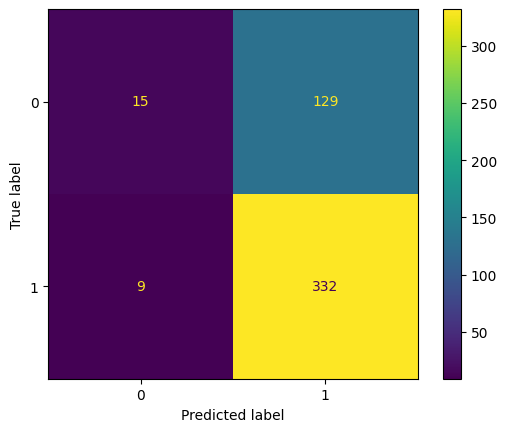

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

In [19]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 20)
explainer = shap.KernelExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)



[2024-07-25 18:31:35.711] Start to evalute the model:
[2024-07-25 18:31:35.712] Evaluating cascade layer = 0 
[2024-07-25 18:31:35.915] Evaluating cascade layer = 1 
[2024-07-25 18:31:36.112] Evaluating cascade layer = 2 
[2024-07-25 18:31:36.309] Evaluating cascade layer = 3 


Using 485 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/485 [00:00<?, ?it/s]

[2024-07-25 18:31:36.670] Start to evalute the model:
[2024-07-25 18:31:36.670] Evaluating cascade layer = 0 
[2024-07-25 18:31:36.705] Evaluating cascade layer = 1 
[2024-07-25 18:31:36.738] Evaluating cascade layer = 2 
[2024-07-25 18:31:36.774] Evaluating cascade layer = 3 
[2024-07-25 18:31:36.916] Start to evalute the model:
[2024-07-25 18:31:37.117] Evaluating cascade layer = 0 
[2024-07-25 18:36:32.081] Evaluating cascade layer = 1 
[2024-07-25 18:41:11.891] Evaluating cascade layer = 2 
[2024-07-25 18:45:57.177] Evaluating cascade layer = 3 


  0%|          | 1/485 [19:02<153:40:09, 1142.99s/it]

[2024-07-25 18:50:39.669] Start to evalute the model:
[2024-07-25 18:50:39.669] Evaluating cascade layer = 0 
[2024-07-25 18:50:39.707] Evaluating cascade layer = 1 
[2024-07-25 18:50:39.744] Evaluating cascade layer = 2 
[2024-07-25 18:50:39.783] Evaluating cascade layer = 3 
[2024-07-25 18:50:39.918] Start to evalute the model:
[2024-07-25 18:50:40.107] Evaluating cascade layer = 0 
[2024-07-25 18:54:32.499] Evaluating cascade layer = 1 
[2024-07-25 18:59:11.109] Evaluating cascade layer = 2 
[2024-07-25 19:03:57.369] Evaluating cascade layer = 3 


  0%|          | 2/485 [37:03<148:27:26, 1106.51s/it]

[2024-07-25 19:08:40.668] Start to evalute the model:
[2024-07-25 19:08:40.668] Evaluating cascade layer = 0 
[2024-07-25 19:08:40.713] Evaluating cascade layer = 1 
[2024-07-25 19:08:40.758] Evaluating cascade layer = 2 
[2024-07-25 19:08:40.801] Evaluating cascade layer = 3 
[2024-07-25 19:08:40.955] Start to evalute the model:
[2024-07-25 19:08:41.151] Evaluating cascade layer = 0 
[2024-07-25 19:12:18.615] Evaluating cascade layer = 1 
[2024-07-25 19:16:48.426] Evaluating cascade layer = 2 
[2024-07-25 19:21:11.708] Evaluating cascade layer = 3 


  1%|          | 3/485 [54:05<142:57:24, 1067.73s/it]

[2024-07-25 19:25:42.233] Start to evalute the model:
[2024-07-25 19:25:42.233] Evaluating cascade layer = 0 
[2024-07-25 19:25:42.270] Evaluating cascade layer = 1 
[2024-07-25 19:25:42.309] Evaluating cascade layer = 2 
[2024-07-25 19:25:42.349] Evaluating cascade layer = 3 
[2024-07-25 19:25:42.473] Start to evalute the model:
[2024-07-25 19:25:42.651] Evaluating cascade layer = 0 
[2024-07-25 19:30:03.130] Evaluating cascade layer = 1 
[2024-07-25 19:34:40.609] Evaluating cascade layer = 2 
[2024-07-25 19:39:28.684] Evaluating cascade layer = 3 


  1%|          | 4/485 [1:12:43<145:18:59, 1087.61s/it]

[2024-07-25 19:44:20.327] Start to evalute the model:
[2024-07-25 19:44:20.327] Evaluating cascade layer = 0 
[2024-07-25 19:44:20.377] Evaluating cascade layer = 1 
[2024-07-25 19:44:20.417] Evaluating cascade layer = 2 
[2024-07-25 19:44:20.457] Evaluating cascade layer = 3 
[2024-07-25 19:44:20.607] Start to evalute the model:
[2024-07-25 19:44:20.777] Evaluating cascade layer = 0 
[2024-07-25 19:49:13.270] Evaluating cascade layer = 1 
[2024-07-25 19:53:59.123] Evaluating cascade layer = 2 
[2024-07-25 19:58:44.775] Evaluating cascade layer = 3 


  1%|          | 5/485 [1:31:56<148:08:55, 1111.11s/it]

[2024-07-25 20:03:33.114] Start to evalute the model:
[2024-07-25 20:03:33.114] Evaluating cascade layer = 0 
[2024-07-25 20:03:33.144] Evaluating cascade layer = 1 
[2024-07-25 20:03:33.191] Evaluating cascade layer = 2 
[2024-07-25 20:03:33.231] Evaluating cascade layer = 3 
[2024-07-25 20:03:33.358] Start to evalute the model:
[2024-07-25 20:03:33.548] Evaluating cascade layer = 0 
[2024-07-25 20:07:36.131] Evaluating cascade layer = 1 
[2024-07-25 20:11:51.732] Evaluating cascade layer = 2 
[2024-07-25 20:16:16.914] Evaluating cascade layer = 3 


  1%|          | 6/485 [1:49:05<144:07:31, 1083.20s/it]

[2024-07-25 20:20:42.117] Start to evalute the model:
[2024-07-25 20:20:42.117] Evaluating cascade layer = 0 
[2024-07-25 20:20:42.161] Evaluating cascade layer = 1 
[2024-07-25 20:20:42.199] Evaluating cascade layer = 2 
[2024-07-25 20:20:42.240] Evaluating cascade layer = 3 
[2024-07-25 20:20:42.386] Start to evalute the model:
[2024-07-25 20:20:42.574] Evaluating cascade layer = 0 
[2024-07-25 20:25:25.915] Evaluating cascade layer = 1 
[2024-07-25 20:30:11.036] Evaluating cascade layer = 2 
[2024-07-25 20:34:57.570] Evaluating cascade layer = 3 


  1%|▏         | 7/485 [2:08:16<146:46:36, 1105.43s/it]

[2024-07-25 20:39:53.329] Start to evalute the model:
[2024-07-25 20:39:53.329] Evaluating cascade layer = 0 
[2024-07-25 20:39:53.368] Evaluating cascade layer = 1 
[2024-07-25 20:39:53.406] Evaluating cascade layer = 2 
[2024-07-25 20:39:53.445] Evaluating cascade layer = 3 
[2024-07-25 20:39:53.588] Start to evalute the model:
[2024-07-25 20:39:53.786] Evaluating cascade layer = 0 
[2024-07-25 20:43:10.503] Evaluating cascade layer = 1 
[2024-07-25 20:46:59.890] Evaluating cascade layer = 2 
[2024-07-25 20:50:09.080] Evaluating cascade layer = 3 


  2%|▏         | 8/485 [2:21:09<132:27:25, 999.68s/it] 

[2024-07-25 20:52:46.503] Start to evalute the model:
[2024-07-25 20:52:46.503] Evaluating cascade layer = 0 
[2024-07-25 20:52:46.533] Evaluating cascade layer = 1 
[2024-07-25 20:52:46.553] Evaluating cascade layer = 2 
[2024-07-25 20:52:46.583] Evaluating cascade layer = 3 
[2024-07-25 20:52:46.693] Start to evalute the model:
[2024-07-25 20:52:46.823] Evaluating cascade layer = 0 
[2024-07-25 20:56:02.035] Evaluating cascade layer = 1 
[2024-07-25 20:59:09.827] Evaluating cascade layer = 2 
[2024-07-25 21:02:18.122] Evaluating cascade layer = 3 


  2%|▏         | 9/485 [3:10:13<212:32:57, 1607.52s/it]

[2024-07-25 21:41:50.549] Start to evalute the model:
[2024-07-25 21:41:50.549] Evaluating cascade layer = 0 
[2024-07-25 21:41:50.577] Evaluating cascade layer = 1 
[2024-07-25 21:41:50.600] Evaluating cascade layer = 2 
[2024-07-25 21:41:50.624] Evaluating cascade layer = 3 
[2024-07-25 21:41:50.719] Start to evalute the model:
[2024-07-25 21:41:50.850] Evaluating cascade layer = 0 
[2024-07-25 21:54:40.721] Evaluating cascade layer = 1 
[2024-07-25 21:57:42.205] Evaluating cascade layer = 2 
[2024-07-25 22:00:48.192] Evaluating cascade layer = 3 


  2%|▏         | 10/485 [3:32:19<200:36:14, 1520.37s/it]

[2024-07-25 22:03:55.767] Start to evalute the model:
[2024-07-25 22:03:55.767] Evaluating cascade layer = 0 
[2024-07-25 22:03:55.792] Evaluating cascade layer = 1 
[2024-07-25 22:03:55.815] Evaluating cascade layer = 2 
[2024-07-25 22:03:55.838] Evaluating cascade layer = 3 
[2024-07-25 22:03:55.934] Start to evalute the model:
[2024-07-25 22:03:56.070] Evaluating cascade layer = 0 
[2024-07-25 22:07:08.847] Evaluating cascade layer = 1 
[2024-07-25 22:10:11.991] Evaluating cascade layer = 2 
[2024-07-25 22:13:19.758] Evaluating cascade layer = 3 


  2%|▏         | 11/485 [3:44:51<169:13:41, 1285.28s/it]

[2024-07-25 22:16:27.993] Start to evalute the model:
[2024-07-25 22:16:27.993] Evaluating cascade layer = 0 
[2024-07-25 22:16:28.017] Evaluating cascade layer = 1 
[2024-07-25 22:16:28.041] Evaluating cascade layer = 2 
[2024-07-25 22:16:28.064] Evaluating cascade layer = 3 
[2024-07-25 22:16:28.157] Start to evalute the model:
[2024-07-25 22:16:28.286] Evaluating cascade layer = 0 
[2024-07-25 22:19:15.151] Evaluating cascade layer = 1 
[2024-07-25 22:22:11.711] Evaluating cascade layer = 2 
[2024-07-25 22:25:15.540] Evaluating cascade layer = 3 


  2%|▏         | 12/485 [3:56:43<145:57:09, 1110.84s/it]

[2024-07-25 22:28:19.874] Start to evalute the model:
[2024-07-25 22:28:19.874] Evaluating cascade layer = 0 
[2024-07-25 22:28:19.898] Evaluating cascade layer = 1 
[2024-07-25 22:28:19.921] Evaluating cascade layer = 2 
[2024-07-25 22:28:19.944] Evaluating cascade layer = 3 
[2024-07-25 22:28:20.037] Start to evalute the model:
[2024-07-25 22:28:20.169] Evaluating cascade layer = 0 
[2024-07-25 22:31:26.403] Evaluating cascade layer = 1 
[2024-07-25 22:34:26.128] Evaluating cascade layer = 2 
[2024-07-25 22:37:31.724] Evaluating cascade layer = 3 


  3%|▎         | 13/485 [4:09:03<130:54:59, 998.52s/it] 

[2024-07-25 22:40:39.921] Start to evalute the model:
[2024-07-25 22:40:39.921] Evaluating cascade layer = 0 
[2024-07-25 22:40:39.947] Evaluating cascade layer = 1 
[2024-07-25 22:40:39.970] Evaluating cascade layer = 2 
[2024-07-25 22:40:39.993] Evaluating cascade layer = 3 
[2024-07-25 22:40:40.087] Start to evalute the model:
[2024-07-25 22:40:40.225] Evaluating cascade layer = 0 
[2024-07-25 22:43:21.505] Evaluating cascade layer = 1 
[2024-07-25 22:46:05.706] Evaluating cascade layer = 2 
[2024-07-25 22:49:07.317] Evaluating cascade layer = 3 


  3%|▎         | 14/485 [4:20:33<118:27:14, 905.38s/it]

[2024-07-25 22:52:10.097] Start to evalute the model:
[2024-07-25 22:52:10.097] Evaluating cascade layer = 0 
[2024-07-25 22:52:10.124] Evaluating cascade layer = 1 
[2024-07-25 22:52:10.148] Evaluating cascade layer = 2 
[2024-07-25 22:52:10.171] Evaluating cascade layer = 3 
[2024-07-25 22:52:10.261] Start to evalute the model:
[2024-07-25 22:52:10.392] Evaluating cascade layer = 0 
[2024-07-25 22:54:42.060] Evaluating cascade layer = 1 
[2024-07-25 22:57:24.179] Evaluating cascade layer = 2 
[2024-07-25 22:59:54.278] Evaluating cascade layer = 3 


  3%|▎         | 15/485 [4:30:46<106:42:22, 817.33s/it]

[2024-07-25 23:02:23.344] Start to evalute the model:
[2024-07-25 23:02:23.344] Evaluating cascade layer = 0 
[2024-07-25 23:02:23.369] Evaluating cascade layer = 1 
[2024-07-25 23:02:23.392] Evaluating cascade layer = 2 
[2024-07-25 23:02:23.416] Evaluating cascade layer = 3 
[2024-07-25 23:02:23.509] Start to evalute the model:
[2024-07-25 23:02:23.637] Evaluating cascade layer = 0 
[2024-07-25 23:05:31.170] Evaluating cascade layer = 1 
[2024-07-25 23:08:26.546] Evaluating cascade layer = 2 
[2024-07-25 23:11:31.360] Evaluating cascade layer = 3 


  3%|▎         | 16/485 [4:43:03<103:18:19, 792.96s/it]

[2024-07-25 23:14:39.735] Start to evalute the model:
[2024-07-25 23:14:39.735] Evaluating cascade layer = 0 
[2024-07-25 23:14:39.759] Evaluating cascade layer = 1 
[2024-07-25 23:14:39.782] Evaluating cascade layer = 2 
[2024-07-25 23:14:39.805] Evaluating cascade layer = 3 
[2024-07-25 23:14:39.900] Start to evalute the model:
[2024-07-25 23:14:40.032] Evaluating cascade layer = 0 
[2024-07-25 23:17:20.555] Evaluating cascade layer = 1 
[2024-07-25 23:20:19.827] Evaluating cascade layer = 2 
[2024-07-25 23:23:25.376] Evaluating cascade layer = 3 


  4%|▎         | 17/485 [4:54:55<99:55:24, 768.64s/it] 

[2024-07-25 23:26:31.817] Start to evalute the model:
[2024-07-25 23:26:31.817] Evaluating cascade layer = 0 
[2024-07-25 23:26:31.840] Evaluating cascade layer = 1 
[2024-07-25 23:26:31.864] Evaluating cascade layer = 2 
[2024-07-25 23:26:31.887] Evaluating cascade layer = 3 
[2024-07-25 23:26:31.981] Start to evalute the model:
[2024-07-25 23:26:32.111] Evaluating cascade layer = 0 
[2024-07-25 23:28:59.893] Evaluating cascade layer = 1 
[2024-07-25 23:31:47.217] Evaluating cascade layer = 2 
[2024-07-25 23:34:43.355] Evaluating cascade layer = 3 


  4%|▎         | 18/485 [5:05:59<95:39:33, 737.42s/it]

[2024-07-25 23:37:36.540] Start to evalute the model:
[2024-07-25 23:37:36.540] Evaluating cascade layer = 0 
[2024-07-25 23:37:36.564] Evaluating cascade layer = 1 
[2024-07-25 23:37:36.587] Evaluating cascade layer = 2 
[2024-07-25 23:37:36.610] Evaluating cascade layer = 3 
[2024-07-25 23:37:36.702] Start to evalute the model:
[2024-07-25 23:37:36.832] Evaluating cascade layer = 0 
[2024-07-25 23:40:42.202] Evaluating cascade layer = 1 
[2024-07-25 23:43:39.612] Evaluating cascade layer = 2 
[2024-07-25 23:46:43.156] Evaluating cascade layer = 3 


  4%|▍         | 19/485 [5:18:12<95:15:41, 735.93s/it]

[2024-07-25 23:49:48.994] Start to evalute the model:
[2024-07-25 23:49:48.995] Evaluating cascade layer = 0 
[2024-07-25 23:49:49.019] Evaluating cascade layer = 1 
[2024-07-25 23:49:49.042] Evaluating cascade layer = 2 
[2024-07-25 23:49:49.066] Evaluating cascade layer = 3 
[2024-07-25 23:49:49.158] Start to evalute the model:
[2024-07-25 23:49:49.288] Evaluating cascade layer = 0 
[2024-07-25 23:53:00.319] Evaluating cascade layer = 1 
[2024-07-26 01:50:31.800] Evaluating cascade layer = 2 
[2024-07-26 01:55:09.918] Evaluating cascade layer = 3 


  4%|▍         | 20/485 [7:58:06<438:36:05, 3395.62s/it]

[2024-07-26 02:29:43.507] Start to evalute the model:
[2024-07-26 02:29:43.508] Evaluating cascade layer = 0 
[2024-07-26 02:29:43.534] Evaluating cascade layer = 1 
[2024-07-26 02:29:43.557] Evaluating cascade layer = 2 
[2024-07-26 02:29:43.582] Evaluating cascade layer = 3 
[2024-07-26 02:29:43.675] Start to evalute the model:
[2024-07-26 02:29:43.805] Evaluating cascade layer = 0 
[2024-07-26 02:46:00.113] Evaluating cascade layer = 1 
[2024-07-26 02:48:52.390] Evaluating cascade layer = 2 
[2024-07-26 02:52:05.003] Evaluating cascade layer = 3 


  4%|▍         | 21/485 [8:23:45<365:49:57, 2838.36s/it]

[2024-07-26 02:55:22.620] Start to evalute the model:
[2024-07-26 02:55:22.620] Evaluating cascade layer = 0 
[2024-07-26 02:55:22.649] Evaluating cascade layer = 1 
[2024-07-26 02:55:22.675] Evaluating cascade layer = 2 
[2024-07-26 02:55:22.701] Evaluating cascade layer = 3 
[2024-07-26 02:55:22.798] Start to evalute the model:
[2024-07-26 02:55:22.935] Evaluating cascade layer = 0 
[2024-07-26 02:58:30.887] Evaluating cascade layer = 1 
[2024-07-26 03:01:35.829] Evaluating cascade layer = 2 
[2024-07-26 03:04:49.322] Evaluating cascade layer = 3 


  5%|▍         | 22/485 [8:44:15<302:56:44, 2355.52s/it]

[2024-07-26 03:15:52.203] Start to evalute the model:
[2024-07-26 03:15:52.203] Evaluating cascade layer = 0 
[2024-07-26 03:15:52.238] Evaluating cascade layer = 1 
[2024-07-26 03:15:52.269] Evaluating cascade layer = 2 
[2024-07-26 03:15:52.306] Evaluating cascade layer = 3 
[2024-07-26 03:15:52.473] Start to evalute the model:
[2024-07-26 03:15:52.653] Evaluating cascade layer = 0 
[2024-07-26 03:19:09.820] Evaluating cascade layer = 1 
[2024-07-26 03:22:22.285] Evaluating cascade layer = 2 
[2024-07-26 03:25:40.009] Evaluating cascade layer = 3 


  5%|▍         | 23/485 [8:57:24<241:58:50, 1885.56s/it]

[2024-07-26 03:29:01.581] Start to evalute the model:
[2024-07-26 03:29:01.581] Evaluating cascade layer = 0 
[2024-07-26 03:29:01.611] Evaluating cascade layer = 1 
[2024-07-26 03:29:01.637] Evaluating cascade layer = 2 
[2024-07-26 03:29:01.664] Evaluating cascade layer = 3 
[2024-07-26 03:29:01.764] Start to evalute the model:
[2024-07-26 03:29:01.899] Evaluating cascade layer = 0 
[2024-07-26 03:32:06.356] Evaluating cascade layer = 1 
[2024-07-26 03:35:12.827] Evaluating cascade layer = 2 
[2024-07-26 03:38:27.862] Evaluating cascade layer = 3 


  5%|▍         | 24/485 [9:10:05<198:13:02, 1547.90s/it]

[2024-07-26 03:41:41.812] Start to evalute the model:
[2024-07-26 03:41:41.812] Evaluating cascade layer = 0 
[2024-07-26 03:41:41.840] Evaluating cascade layer = 1 
[2024-07-26 03:41:41.866] Evaluating cascade layer = 2 
[2024-07-26 03:41:41.891] Evaluating cascade layer = 3 
[2024-07-26 03:41:41.989] Start to evalute the model:
[2024-07-26 03:41:42.140] Evaluating cascade layer = 0 
[2024-07-26 03:44:45.650] Evaluating cascade layer = 1 
[2024-07-26 03:47:54.557] Evaluating cascade layer = 2 
[2024-07-26 03:51:00.134] Evaluating cascade layer = 3 


  5%|▌         | 25/485 [9:22:33<167:07:07, 1307.89s/it]

[2024-07-26 03:54:09.775] Start to evalute the model:
[2024-07-26 03:54:09.775] Evaluating cascade layer = 0 
[2024-07-26 03:54:09.808] Evaluating cascade layer = 1 
[2024-07-26 03:54:09.834] Evaluating cascade layer = 2 
[2024-07-26 03:54:09.861] Evaluating cascade layer = 3 
[2024-07-26 03:54:09.964] Start to evalute the model:
[2024-07-26 03:54:10.111] Evaluating cascade layer = 0 
[2024-07-26 03:56:57.230] Evaluating cascade layer = 1 
[2024-07-26 03:59:55.460] Evaluating cascade layer = 2 
[2024-07-26 04:03:02.059] Evaluating cascade layer = 3 


  5%|▌         | 26/485 [9:34:38<144:27:56, 1133.06s/it]

[2024-07-26 04:06:14.960] Start to evalute the model:
[2024-07-26 04:06:14.960] Evaluating cascade layer = 0 
[2024-07-26 04:06:14.985] Evaluating cascade layer = 1 
[2024-07-26 04:06:15.010] Evaluating cascade layer = 2 
[2024-07-26 04:06:15.036] Evaluating cascade layer = 3 
[2024-07-26 04:06:15.133] Start to evalute the model:
[2024-07-26 04:06:15.269] Evaluating cascade layer = 0 
[2024-07-26 04:09:14.339] Evaluating cascade layer = 1 
[2024-07-26 04:12:18.223] Evaluating cascade layer = 2 
[2024-07-26 04:15:31.645] Evaluating cascade layer = 3 


  6%|▌         | 27/485 [9:47:08<129:32:12, 1018.19s/it]

[2024-07-26 04:18:45.153] Start to evalute the model:
[2024-07-26 04:18:45.153] Evaluating cascade layer = 0 
[2024-07-26 04:18:45.180] Evaluating cascade layer = 1 
[2024-07-26 04:18:45.205] Evaluating cascade layer = 2 
[2024-07-26 04:18:45.231] Evaluating cascade layer = 3 
[2024-07-26 04:18:45.329] Start to evalute the model:
[2024-07-26 04:18:45.468] Evaluating cascade layer = 0 
[2024-07-26 04:22:00.727] Evaluating cascade layer = 1 
[2024-07-26 04:25:10.964] Evaluating cascade layer = 2 
[2024-07-26 04:28:20.269] Evaluating cascade layer = 3 


  6%|▌         | 28/485 [9:59:57<119:46:23, 943.51s/it] 

[2024-07-26 04:31:34.404] Start to evalute the model:
[2024-07-26 04:31:34.405] Evaluating cascade layer = 0 
[2024-07-26 04:31:34.430] Evaluating cascade layer = 1 
[2024-07-26 04:31:34.456] Evaluating cascade layer = 2 
[2024-07-26 04:31:34.481] Evaluating cascade layer = 3 
[2024-07-26 04:31:34.575] Start to evalute the model:
[2024-07-26 04:31:34.709] Evaluating cascade layer = 0 
[2024-07-26 04:34:13.945] Evaluating cascade layer = 1 
[2024-07-26 04:37:09.295] Evaluating cascade layer = 2 
[2024-07-26 04:40:10.824] Evaluating cascade layer = 3 


  6%|▌         | 29/485 [10:11:48<110:40:22, 873.73s/it]

[2024-07-26 04:43:25.349] Start to evalute the model:
[2024-07-26 04:43:25.349] Evaluating cascade layer = 0 
[2024-07-26 04:43:25.375] Evaluating cascade layer = 1 
[2024-07-26 04:43:25.401] Evaluating cascade layer = 2 
[2024-07-26 04:43:25.427] Evaluating cascade layer = 3 
[2024-07-26 04:43:25.520] Start to evalute the model:
[2024-07-26 04:43:25.659] Evaluating cascade layer = 0 
[2024-07-26 04:46:19.766] Evaluating cascade layer = 1 
[2024-07-26 04:49:21.636] Evaluating cascade layer = 2 
[2024-07-26 04:52:29.313] Evaluating cascade layer = 3 


  6%|▌         | 30/485 [12:36:32<406:33:26, 3216.72s/it]

[2024-07-26 07:08:08.848] Start to evalute the model:
[2024-07-26 07:08:08.848] Evaluating cascade layer = 0 
[2024-07-26 07:08:08.874] Evaluating cascade layer = 1 
[2024-07-26 07:08:08.899] Evaluating cascade layer = 2 
[2024-07-26 07:08:08.925] Evaluating cascade layer = 3 
[2024-07-26 07:08:09.017] Start to evalute the model:
[2024-07-26 07:08:09.149] Evaluating cascade layer = 0 
[2024-07-26 07:11:37.944] Evaluating cascade layer = 1 
[2024-07-26 07:14:59.071] Evaluating cascade layer = 2 
[2024-07-26 07:18:16.422] Evaluating cascade layer = 3 


  6%|▋         | 31/485 [12:49:57<314:24:43, 2493.13s/it]

[2024-07-26 07:21:33.661] Start to evalute the model:
[2024-07-26 07:21:33.661] Evaluating cascade layer = 0 
[2024-07-26 07:21:33.686] Evaluating cascade layer = 1 
[2024-07-26 07:21:33.710] Evaluating cascade layer = 2 
[2024-07-26 07:21:33.734] Evaluating cascade layer = 3 
[2024-07-26 07:21:33.827] Start to evalute the model:
[2024-07-26 07:21:33.956] Evaluating cascade layer = 0 


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_red":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_utils.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_blue":
c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\_api\__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


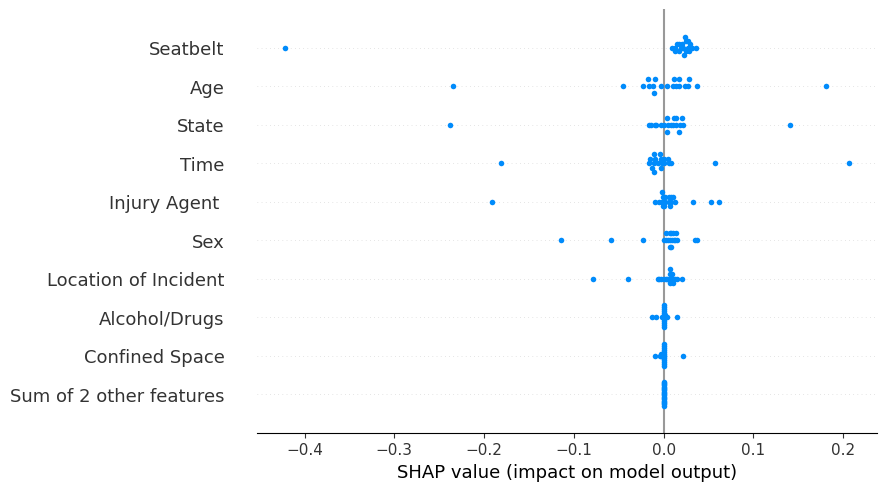

In [ ]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)